In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


stop_words = set(stopwords.words('english'))

style.use('ggplot')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [7]:
sent = "It has been raining outside heavily"
sent = sent.split()  # Tokenize the sentence into words
stemmer = PorterStemmer() # Initialize the stemmer without arguments
text=[stemmer.stem(word) for word in sent] # Apply stemming to each word
print(text)

['it', 'ha', 'been', 'rain', 'outsid', 'heavili']


In [10]:
df=pd.read_csv('/content/drive/MyDrive/python/vaccination_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [11]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.102000e+04,1.102000e+04,11020.000000,1.102000e+04,11020.000000,11020.000000
mean,1.372977e+18,3.518827e+04,1170.470236,1.533289e+04,1.360436,7.510617
std,3.311622e+16,2.942509e+05,2798.429673,4.944401e+04,11.364732,51.192608
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.347623e+18,1.110000e+02,164.000000,4.360000e+02,0.000000,0.000000
50%,1.360274e+18,4.790000e+02,460.000000,2.323500e+03,0.000000,1.000000
75%,1.395234e+18,2.171250e+03,1221.000000,1.114075e+04,1.000000,4.000000
max,1.463244e+18,1.371493e+07,103226.000000,1.213794e+06,678.000000,2315.000000


In [12]:
df['text'].isnull().sum()
#We have only checked null values from the column we actually need

np.int64(0)

In [13]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [14]:
text_df=df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date',  'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis=1)
text_df.head()
#dropped all the columns we dont require

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [15]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [16]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [17]:
#preprocessing
def data_processing(text):
  text=text.lower()
  text=re.sub(r"https\S+|www\S+https\S+",'',text,flags=re.MULTILINE) #removes url
  text=re.sub(r'\@w+|\#','',text) #removes twitter hashtags and handles
  text=re.sub (r'[^\w\s]','',text) #removes any non-alphanumeric characters
  text_tokens=word_tokenize(text) #converts text into individual words
  filtered_text=[w for w in text_tokens if not w in stop_words] #filters stopwords(nltk) from text like on,of,to,are
  return " ".join(filtered_text)

In [19]:
nltk.download('punkt')
text_df.text = text_df['text'].apply(data_processing)
#apply() is a function of pandas used to apply certain procedure on a dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [20]:
text_df=text_df.drop_duplicates('text')

In [21]:
stemmer=PorterStemmer()
def stemming(data):
  text=[stemmer.stem(word) for word in data]
  return data
#running,ran,runs > run

In [22]:
text_df['text']=text_df['text'].apply(lambda x:stemming(x))
text_df.head()

/tmp/ipython-input-22-1930930149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text']=text_df['text'].apply(lambda x:stemming(x))


,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [23]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [24]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10543 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10543 non-null  object
dtypes: object(1)
memory usage: 164.7+ KB


In [25]:
def polarity(text):
  return TextBlob(text).sentiment.polarity
#tells the polarity(sentiment) of text such as -1neg, 0neut, 1pos

In [26]:
text_df['polarity']=text_df['text'].apply(polarity)
text_df.head(10)

/tmp/ipython-input-26-2480146283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['polarity']=text_df['text'].apply(polarity)


,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [27]:
def sentiment(label):
  if label <0:
    return "Negative"
  elif label==0:
    return "Neutral"
  elif label>0:
    return "Positive"

In [28]:
text_df['sentiment']=text_df['polarity'].apply(sentiment)
text_df.head()

/tmp/ipython-input-28-1620505370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['sentiment']=text_df['polarity'].apply(sentiment)


,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

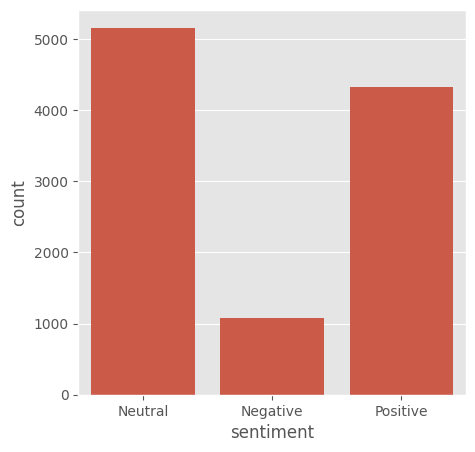

In [29]:
#visulaize
fig=plt.figure(figsize=(5,5))
sns.countplot(x='sentiment',data=text_df)

numpy.int64

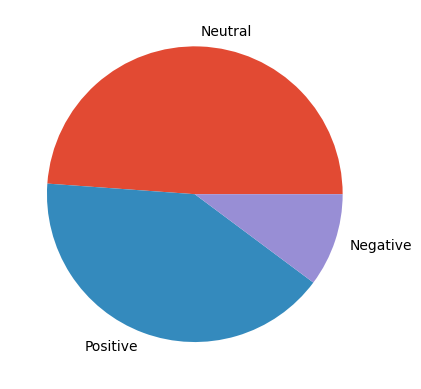

In [30]:
tags=text_df['sentiment'].value_counts()
plt.pie(tags.values,labels=tags.index)
type(tags.values[0])

In [31]:
pos_tweets=text_df[text_df.sentiment=='Positive']
pos_tweets=pos_tweets.sort_values(['polarity'],ascending=False)
pos_tweets.head()

,text,polarity,sentiment
11,cnnbrk covid19 covidvaccine vaccine corona pfi...,1.0,Positive
10922,best day ever biggest sigh relief hope pray ev...,1.0,Positive
1287,excellent read pfizerbiontech covidvaccination,1.0,Positive
1428,check excellent resource vaccines amp immunity...,1.0,Positive
6378,cnn sputnikv vaccine seems best even doctors w...,1.0,Positive


<function matplotlib.pyplot.show(close=None, block=None)>

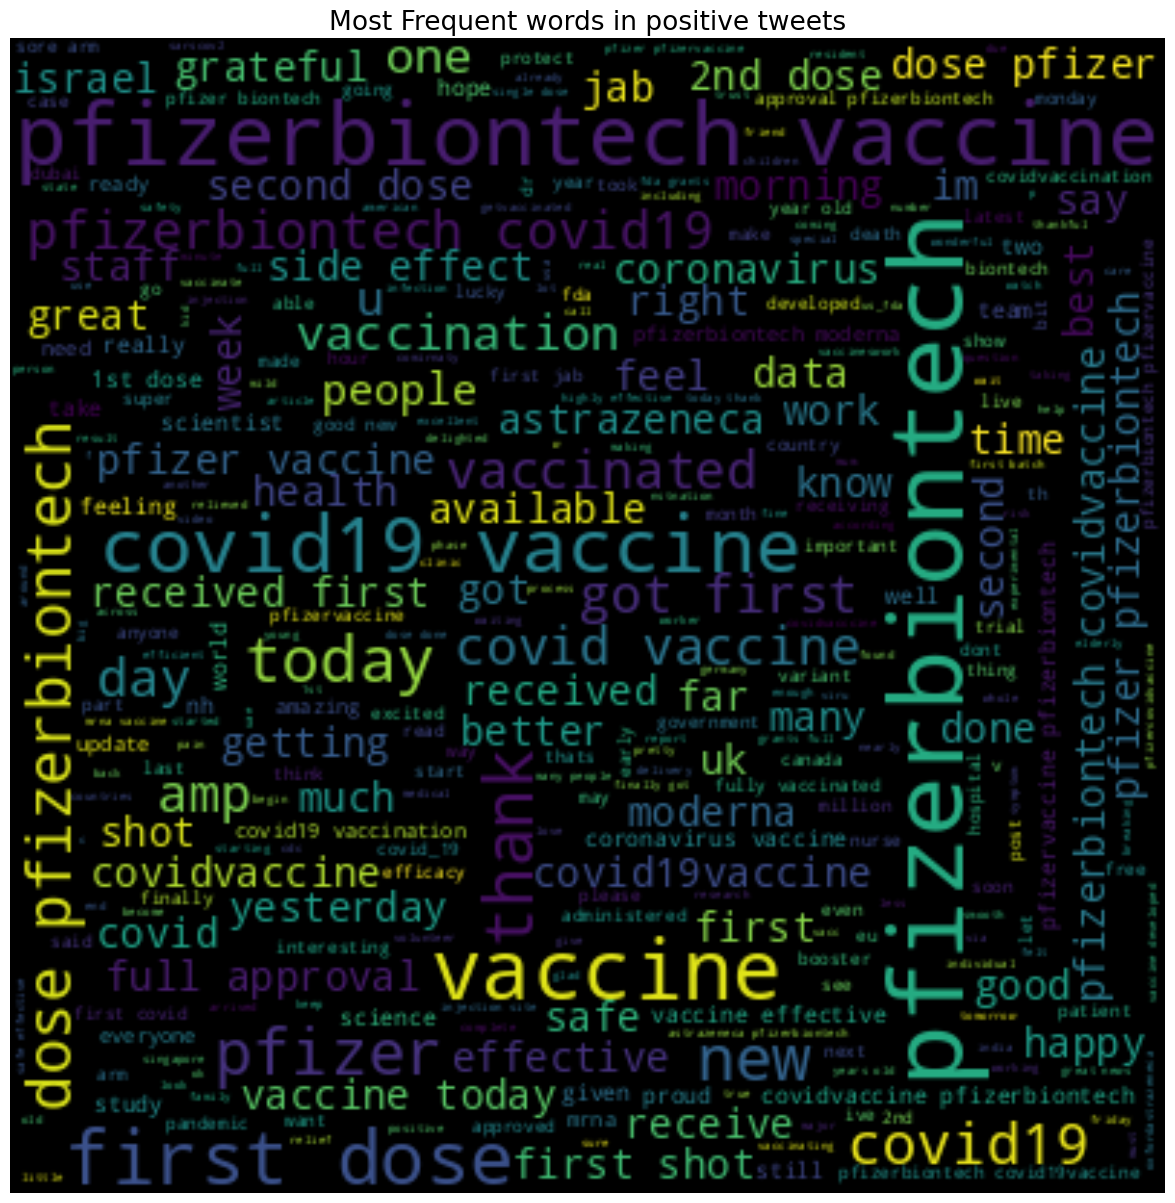

In [32]:
text=' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500,width=400,height=400).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent words in positive tweets',fontsize=19)
plt.show

In [33]:
neg_tweets=text_df[text_df.sentiment=='Negative']
neg_tweets=neg_tweets.sort_values(['polarity'],ascending=False)
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative


<function matplotlib.pyplot.show(close=None, block=None)>

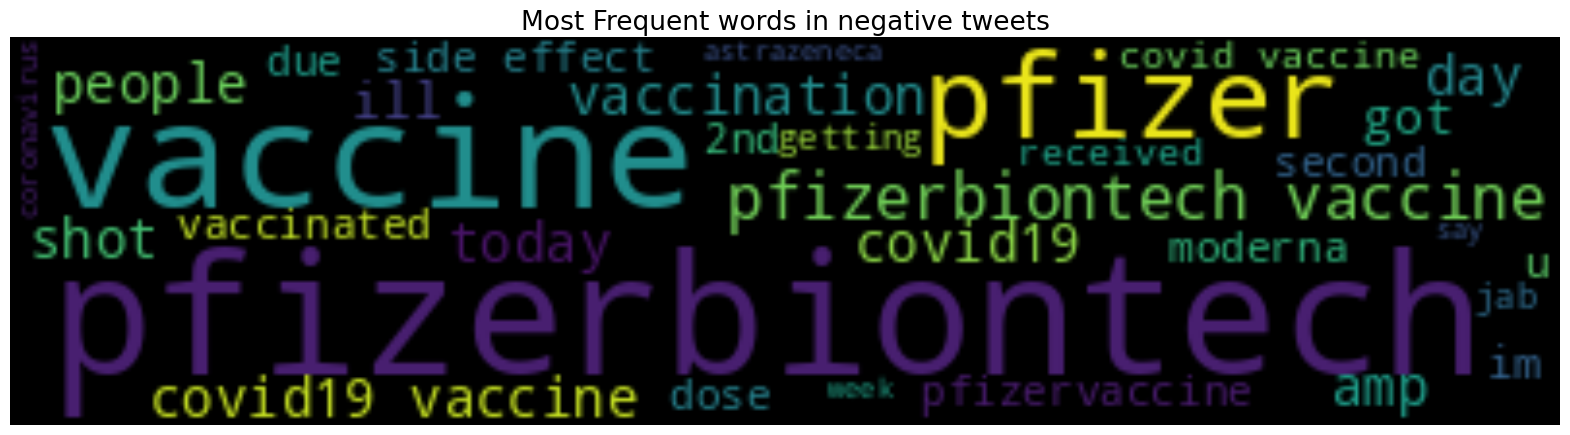

In [34]:
text=' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500,width=400,height=100).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent words in negative tweets',fontsize=19)
plt.show

In [35]:
neutral_tweets=text_df[text_df.sentiment=='Neutral']
neutral_tweets=neutral_tweets.sort_values(['polarity'],ascending=False)
neutral_tweets.head()

,text,polarity,sentiment
11019,number covid19 cases today 15 november 2021 re...,0.0,Neutral
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral
8,covid vaccine getting covidvaccine covid19 pfi...,0.0,Neutral


<function matplotlib.pyplot.show(close=None, block=None)>

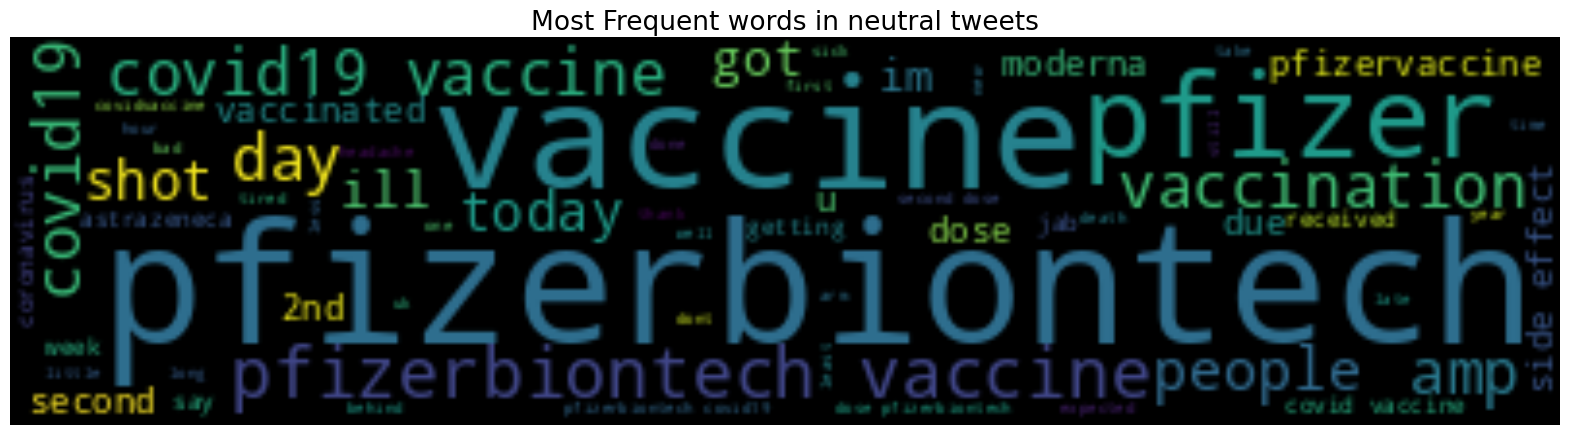

In [36]:
ext=' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500,width=400,height=100).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent words in neutral tweets',fontsize=19)
plt.show

In [37]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [38]:
X= text_df['text']
Y= text_df['sentiment']
X=vect.transform(X)

In [39]:
x_train, x_test, y_train , y_test=train_test_split(X,Y, test_size=0.2, random_state=42)


In [40]:
print("size  of x_train: ",(x_train.shape))
print("size  of y_train: ",(y_train.shape))
print("size  of x_test: ",(x_test.shape))
print("size  of y_test: ",(y_test.shape))

size  of x_train:  (8434, 78583)
size  of y_train:  (8434,)
size  of x_test:  (2109, 78583)
size  of y_test:  (2109,)


In [41]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()

if hasattr(x_train, 'toarray'):
    x_train = x_train.toarray()
if hasattr(x_test, 'toarray'):
    x_test = x_test.toarray()

gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
gnb_acc = accuracy_score(y_test, gnb_pred)
print("GaussianNB test accuracy: {:,.2f}%".format(gnb_acc * 100))

GaussianNB test accuracy: 59.03%


In [55]:
from sklearn.svm import LinearSVC

In [56]:
SVCmodel=LinearSVC()
SVCmodel.fit(x_train,y_train)

LinearSVC()

In [57]:
svc_pred= SVCmodel.predict(x_test)
svc_acc=accuracy_score(svc_pred,y_test)
print("test accuracy: {:,.2f}%".format(svc_acc*100))

test accuracy: 87.34%
